## Additional work

### Since I wasn't able to fully simulate the jockeying part of the three teller simulation and I really want to do something to make up for it: I did some Object-oriented system design in Python, which I am more familiar with. This work is reusable for more flexible future model developments.
#### This is a system with basic functionality completed. Other features to be added: preemption/ jockeying.

In [5]:
class Individual ():

        def __init__ (self, arrival_time ):
            self.arrival_time = arrival_time

        def enter_queue ( self, previous_exit_time ,service_rate ):
            self.service_time = random . expovariate (service_rate )
            self.service_start = max(self. arrival_time ,previous_exit_time )
            self.exit_time = self.service_start +self.service_time


class SimulationModel ():

        def __init__ ( self , demand , service_rate ):
            self.queue = []
            self.demand = demand
            self.service_rate = sevice_rate

        def clean_up_queue ( self , t ):
            self.queue = [ individual for individual in self . queue if individual .exit_time > t ]
            

            
        def main_simulation_loop ( self , max_simulation_time ): 
            t = 0
          
            previous_exit_time = 0
        
            while t < max_simulation_time :
            
                t += random.expovariate ( self . demand )
                new_individual = Individual ( t )
                self.queue.append ( new_individual )
                new_individual.enter_queue ( previous_exit_time ,self . service_rate )
                self.clean_up_queue ( t )
                previous_exit_time = new_individual.exit_time

##### I refered to/ adapted from queueing system sample codes in C++/ R and Python on Github for the function design.

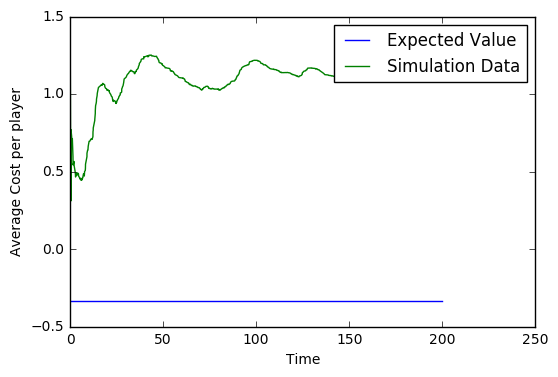

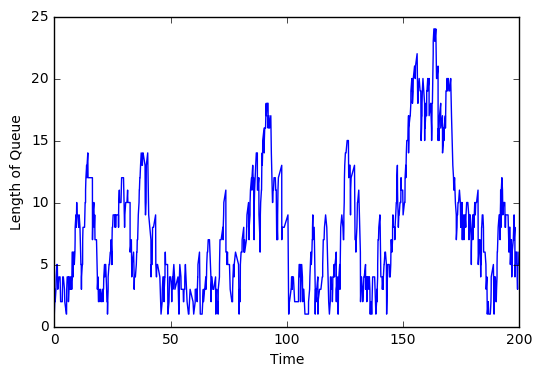

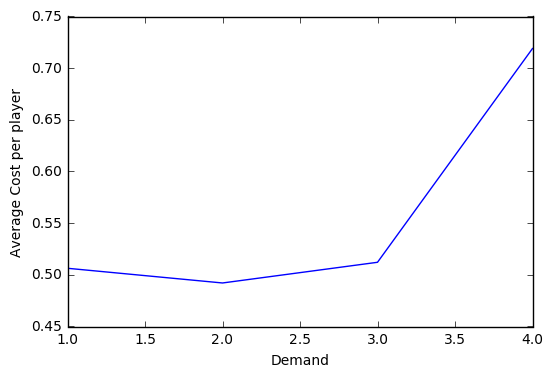

In [9]:
"""
A simulation of an M/M/c queueing system.
Usage: main.py [options] <arrival_rate> <service_rate> <servers> <time> <switch>
Arguments:
    arrival_rate rate of arrival into the queue
    service_rate rate at which each of the servers work
    servers number of servers at the queueing system
    time length of time to run the simulation model
    switch: 
    1-first customer to switch
    2-last customer to switch
    0-no jockeying allowed
Options:
    --wait_graph  generates a grpah of average wait over time
    --lmbda_graph  generates a graph of average wait over time for varying demand
    --length_graph  generates a graph of the length of the queue
"""
from __future__ import division

#from docopt import docopt
import matplotlib.pyplot as plt
import random

class Player:
    #individual customer moving through the queue
    def __init__(self, arrival_time):
        #Stores the initial data
        #Arguments: arrival_time: the time the players arrived into the queue
        self.arrival_time = arrival_time
    
    def enter_queue(self, queue):
        #place the player in the queue
        next_available_time = min(queue.next_available_times)
        next_available_server = queue.next_available_times.index(next_available_time)

        self.service_time = queue.service_time()
        self.service_start_time = max(self.arrival_time, next_available_time)
        self.service_end_time = self.service_start_time + self.service_time

        self.wait = self.service_end_time - self.arrival_time

        queue.next_available_times[next_available_server] = self.service_end_time
        queue.queue.append(self)

class Queue:
   
   # A class for the queue with multiple servers

    def __init__(self, service_rate, no_of_servers = 1):
        #Stores the initial parameters of the queue
        #Arguments: service_rate: the rate at which players are served at the queue
                    #no_of_servers: the number of servers at the queue
       
        
        self.service_rate = service_rate
        self.next_available_times = [0 for server in range(no_of_servers)]
        self.queue = []
    
    def is_not_full(self,max_length):
        return(1*(len(self.queue)<10))
        
    def service_time(self):
        #Returns a service rate sampled from a negative exponential distribution
        return random.expovariate(self.service_rate)

    def clean_up_queue(self, time):
       
       # Removes players from a queue that have finished service
       
       # Arguments: time: current time
        self.queue = [Player for Player in self.queue if Player.service_end_time > time]

class SimulationModel():
    
   
   # A class for the simulation model

    def __init__(self, arrival_rate, service_rate, no_of_servers):
        #Stores the parameters of the Model

        self.arrival_rate = arrival_rate
        self.queue = Queue(service_rate, no_of_servers)

    def main_simulation_loop(self, simulation_time, snap_shot = True):
        #simulate in the loop function
        #plot: performance measures
        #Arguments: simulation_time
         
        time = 0
        players = {}   #an empty list of player objects
        snapshots = {}
        no_of_players = 0
        
        while time < simulation_time:
         
        #When the bank is still open   
            
            new_player = Player(time)
            no_of_players += 1
            players[no_of_players] = new_player   #add to current player list

            new_player.enter_queue(self.queue)
            self.queue.clean_up_queue(time)
            
            time += random.expovariate(self.arrival_rate)

            
            if snap_shot:
                snapshots[time] = Snapshot(players, self.queue)

        
        return players, snapshots 

class Snapshot:
   
    def __init__(self, players, queue):
       
    # Stores the state of the system for analysis 

        self.queue_length = len(queue.queue)
        self.average_wait = sum(players[ID].wait for ID in players )/len(players)


class DataAnalyser:
    
    def plot_expected_length_stay(self, snaps):
        # plot the average wait per player in the queueing system

        times = [snap for snap in snaps]
        times.sort()

        sim_data = [[time for time in times],[snaps[time].average_wait for time in times]]
        theoretical_data = [[time for time in times],[1/(service_rate - arrival_rate) for time in times]]
        
        plt.plot(theoretical_data[0],theoretical_data[1], label = 'Expected Value')
        plt.plot(sim_data[0],sim_data[1], label = 'Simulation Data')
        plt.xlabel('Time')
        plt.legend()
        plt.ylabel('Average Cost per player')
        plt.show()

    def plot_varying_lambda(self, time, max_lmbda, service_rate, servers):
        
        # plot the average wait per player in the queueing system

        
        sim_data = [[],[]]

        for lmbda in range(1, max_lmbda):
            a = SimulationModel(lmbda, service_rate, servers)
            players, snaps = a.main_simulation_loop(time, snap_shot = False)
            sim_data[0].append(lmbda)
            sim_data[1].append(sum(players[ID].wait for ID in players)/len(players))
            
                
        plt.plot(sim_data[0],sim_data[1])
        plt.xlabel('Demand')
        plt.ylabel('Average Cost per player')
        plt.show()

    def plot_length(self, snaps):
        #Function to plot the length of a queue over time

        times = [snap for snap in snaps]
        times.sort()

        sim_data = [[time for time in times],[snaps[time].queue_length for time in times]]
        
        plt.plot(sim_data[0],sim_data[1])
        plt.xlabel('Time')
        plt.xlim(0,time)
        plt.ylabel('Length of Queue')
        plt.show()

#main function call....
arrival_rate   = 5
service_rate = 2
servers = 3
time = 200
wait_graph =  1
lmbda_graph = 1
length_graph = 1

a = SimulationModel(arrival_rate, service_rate, servers)
players, snaps = a.main_simulation_loop(time, snap_shot = True)

if wait_graph:
    D = DataAnalyser()
    D.plot_expected_length_stay(snaps)
if length_graph:
    D = DataAnalyser()
    D.plot_length(snaps)
if lmbda_graph:
    D = DataAnalyser()
    D.plot_varying_lambda(time, arrival_rate, service_rate, servers)